<a href="https://colab.research.google.com/github/warriors8970/dog-vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Image Classification
* Import data
* Check the import using Image from IPython
* Convert labels into array
* Seperate unique breeds
* Convert the Labels into numbers
* Convert images into tensors(fancy word for num array)

In [2]:
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision/"

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

## Importing data

In [4]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
labels_csv[0:9001]

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


id               breed
0     000bec180eb18c7604dcecc8fe0dba07         boston_bull
1     001513dfcb2ffafc82cccf4d8bbaba97               dingo
2     001cdf01b096e06d78e9e5112d419397            pekinese
3     00214f311d5d2247d5dfe4fe24b2303d            bluetick
4     0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
...                                ...                 ...
8996  e1fa947ecb1ca186470952a971376bc6  miniature_pinscher
8997  e1fe81af46e109cc63e17616dc630fb7        bull_mastiff
8998  e201fdbcd92e3d0a10d612d5e0b77b35             redbone
8999  e208bfa575753207f240ed5619f93c41            papillon
9000  e20e32bf114141e20a1af854ca4d0ecc     tibetan_mastiff

[9001 rows x 2 columns]

<Axes: >

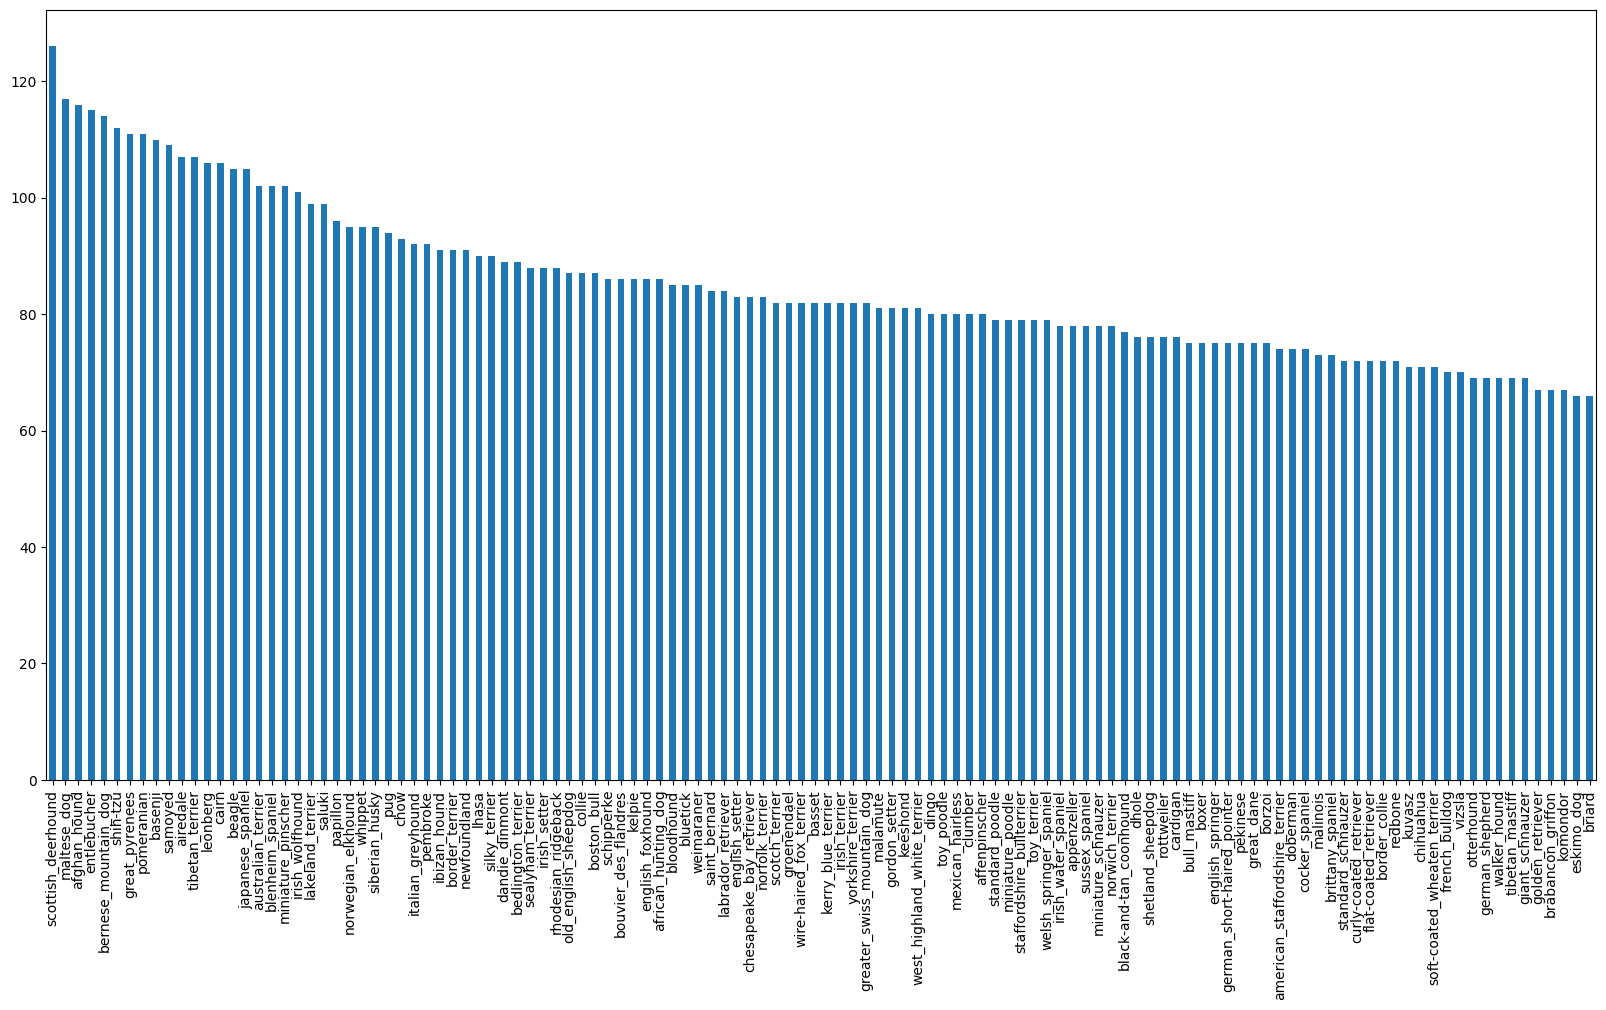

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

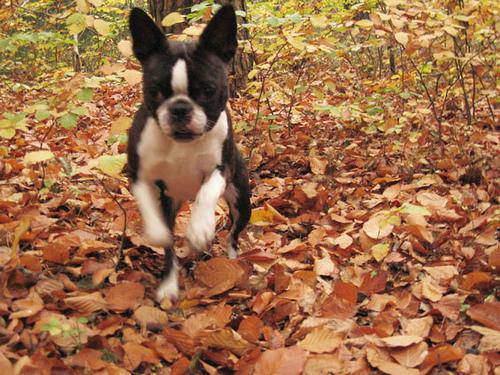

In [6]:
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [7]:
filenames = ["/content/drive/MyDrive/Dog Vision/train/"+ fname +".jpg" for fname in labels_csv["id"]]
filenames[300]

'/content/drive/MyDrive/Dog Vision/train/073bb2f975ee39406e692e33364762a3.jpg'

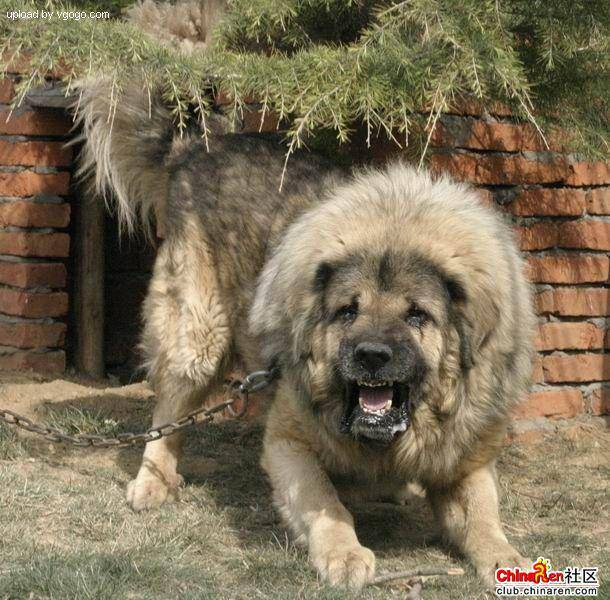

In [8]:
Image(filenames[9000])

In [9]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [10]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

## Convert Labels into numbers
* Step 1: Convert them to boolean
* Step 2: Create a validation set(if not given)


In [11]:
# convert into boolean
print(labels[0])
unique_breeds == labels[0]

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
boolean_labels = [label == unique_breeds for label in labels]

print("boolean labels: ",len(boolean_labels))
print("labels: ",len(labels))

boolean labels:  10222
labels:  10222


In [13]:
X = filenames
y = boolean_labels

Note: use ~1000 instead of 10000 for classification cuz 10000 can take too much time

In [14]:
NUM_IMAGES = 1000 #@param{type: "slider", min: 1000, max: 10000, step: 1000}

# Splitting train and validation dataset

In [15]:
# split as train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size= 0.2,
                                                  random_state= 42)

In [16]:
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

## Converting images into tensors (Preprocessing)
Refer this
- https://www.tensorflow.org/guide/data
- https://www.tensorflow.org/tutorials - Under load and preprocess data
- Build a function which consists of
    - image path as input
    - using tf to read the file and save it to `image`
    - turn images into tensors
    - normalize channels (color channels from 0-255 to 0-1)
    - resize the image

In [17]:
#convert image into numpy
from matplotlib.pyplot import imread
image = imread(filenames[42])
image

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]

In [18]:
#putting it into a tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

# New Functions:
- process_image (convert images into tensors)
- get_image_label (maps images and labels)
- create_data_batches (create small batches with 32 images for training, validation and testing)
- show_25_images (visualize images in a set of 25 - 5 x 5)
- create_model (to create a model which takes input shape, model_url and output shape)
- create_tensorboard_callback (creating tensorboard callback to check the progress)
-

In [19]:
#defining size
IMG_SIZE = 224;
#function
def process_image(image_path, img_size = IMG_SIZE):
  #read the filepath
  image = tf.io.read_file(image_path)
  #convert jpeg to tensors with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)
  #convert color channels form 0-255 to 0-1
  image = tf.image.convert_image_dtype(image,tf.float32)
  #resize the image
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
  return image


## Convert it into batches
 - batch size: 32
 - if test dataset
    - no labels -> tensor the filepaths
    - map the tensor filepaths to batches
 - else if valid dataset
    - convert labels and filepaths to tensors
    - map both labels and filepaths to batches
 - else if training dataset
    - convert the labels and filepaths to tensors
    - shuffle the tensors
    - map to batches

In [20]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [21]:
process_image(filenames[42],tf.constant(y[42]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117759],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

In [22]:
BATCH_SIZE = 32
#function to turn data into batches
def create_data_batches(X,y=None,batch_size = BATCH_SIZE, valid_data = False, test_data= False):
  # if data in test dataset, we dont have labels
    if test_data:
      print("Creating test data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))#only filepaths
      data_batch = data.map(process_image).batch(BATCH_SIZE)
      return data_batch

    # if data in valid dataset, we dont need to shuffle
    elif valid_data:
      print("Creating valid data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X),# filepaths
                                                 tf.constant(y))) # labels
      data_batch = data.map(get_image_label).batch(BATCH_SIZE)
      return data_batch

    else:
      print("Creating training data batches...")
      # turn filepaths into tensors
      data =tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                           tf.constant(y)))
      # shuffle before mapping
      data = data.shuffle(buffer_size = len(X))# buffer_size is the total size to be shuffled
      data = data.map(get_image_label)# map the labels
      data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [23]:
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val, valid_data = True)

Creating training data batches...
Creating valid data batches...


### Check if batches are created

In [24]:
train_data.element_spec, val_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing them Batches
- Create a function to visualize it
  - Setup fig size
  - loop through 25, to see 25 images
- Turn batches into iterators to view
- Use them in train, valid datasets

In [25]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):

  plt.figure(figsize =(10,10));
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")





In [26]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

##### Train dataset

In [27]:
# convert batch to iterator(numpy)

train_images, train_labels = next(train_data.as_numpy_iterator())

In [28]:
len(train_labels), len(train_images)

(32, 32)

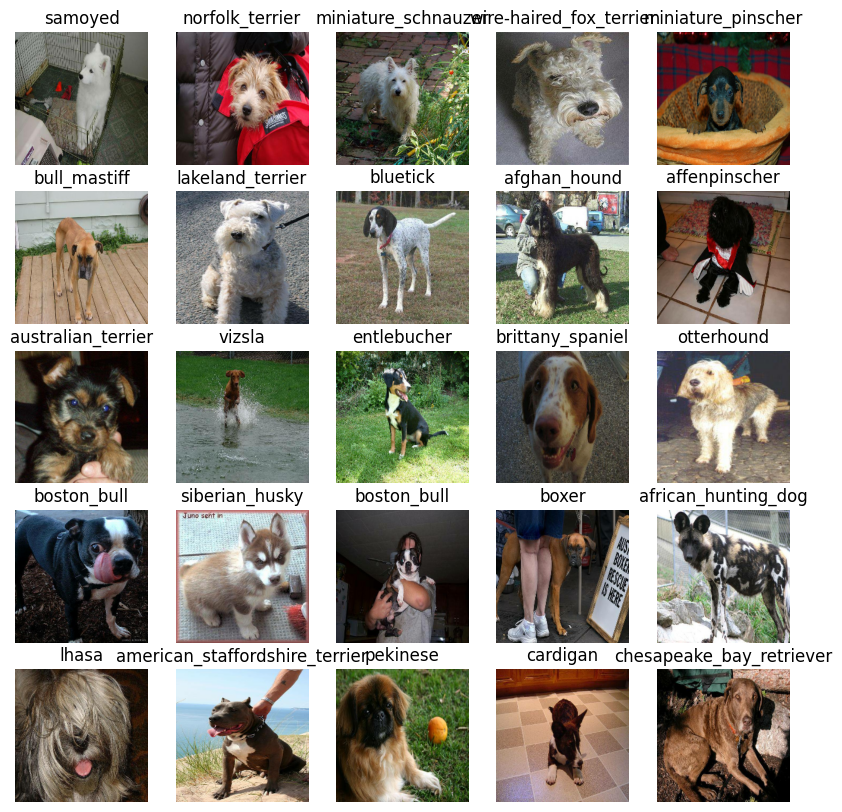

In [29]:
show_25_images(train_images, train_labels)

##### Validation dataset

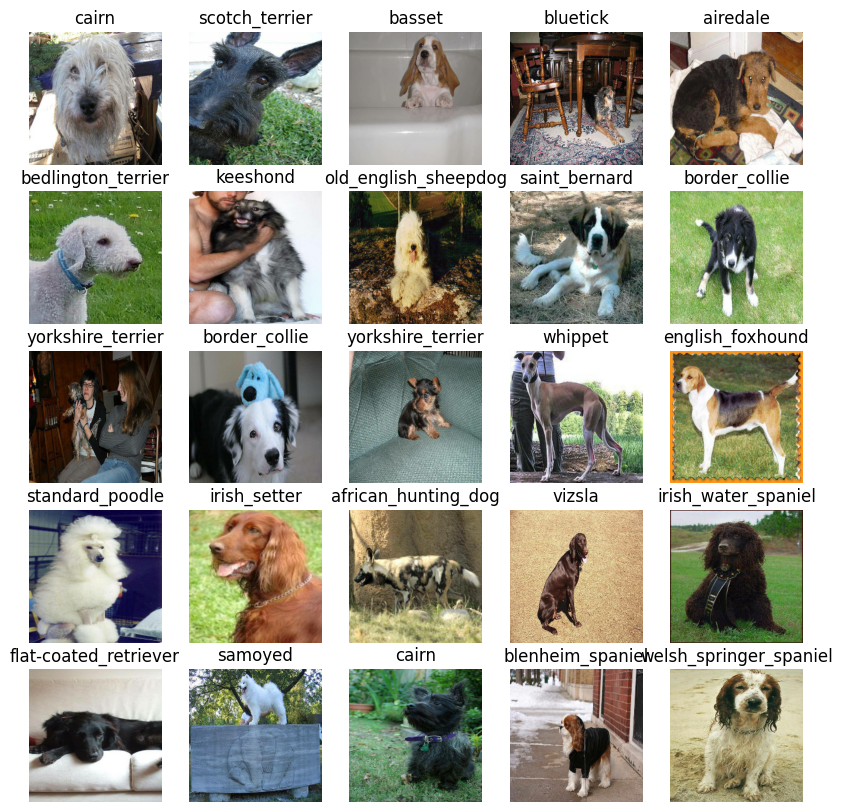

In [30]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Defining Inputs and Outputs for the model
- Inputs - Images in the form of tensors
- Outputs - length of unique breeds

##### Model - we take from TensorflowHub

In [31]:
## Inputs

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

## Output shape
OUTPUT_SHAPE = len(unique_breeds)

## Model URL
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

### Creating a function for the model
- Takes input shape, output shape and Model as parameters
-Compile the model

In [32]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # input layer # taking kerasLayer to upload out image db to train in model_url
      tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                            activation = "softmax") # Output Layer # softmax - function to bring model o/ps in 0's and 1's
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(), # loss - long ass slope
      optimizer = tf.keras.optimizers.Adam(), # minimizing the slope using optimizer - Adam() - function to indicate or a travel guide
      metrics = ["accuracy"] # we choose accuracy here(guided by accuracy)
  )
  model.build(INPUT_SHAPE)
  return model


In [33]:
model = create_model()
model.summary()   # this model is trained in imagenet(keras_layer) and our dog images
                  # are in dense layer, we gonna put it on top of keras_layer

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating model Callbacks
- Why?
    - helper function for a model to save its progress
    - check its progress
    - stop early if model stops improving

- Were gonna use 2 callbacks
  - Tensorboard callback - to check the progress
  - Callback for early stopping - to avoid overfitting
  

#### Tensorboard callback
- load tensorboard notebook extension
- create callback to save log
- visualize logs

In [34]:
# load tensorboard
%load_ext tensorboard

In [35]:
import datetime
import os

# creating function for tensorboard callback
def create_tensorboard_callback():
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

#### Early stopping callback
- to stop the model from training if no improvement or under improvement is there

In [36]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 3)


## Training Neural Network Model
- Create no. of epochs gonna be used

In [37]:
NUM_EPOCHS = 100 #@param {type: "slider", min: 10, max: 100}

# Function to check if GPU is there or not

In [38]:
print("GPU","available(YESS)" if tf.config.list_physical_devices("GPU") else "not avail")

GPU not avail


### Create a function train_model
- create a model using `create_model()`
- setting up tensorboard callback
- passing training, val data, no of epochs into `fit()`


In [39]:
def train_model():

  model = create_model()
 # create a tensorboard everytime we train a model
  tensorboard = create_tensorboard_callback()

  # fit
  model.fit(x = train_data,
            epochs=NUM_EPOCHS,
            validation_data = val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  return model



## Training a model

In [40]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 113s 4s/step - loss: 4.5057 - accuracy: 0.1063 - val_loss: 3.4577 - val_accuracy: 0.2450
Epoch 2/100
25/25 [==============================] - 33s 1s/step - loss: 1.5991 - accuracy: 0.6875 - val_loss: 2.1939 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 32s 1s/step - loss: 0.5531 - accuracy: 0.9525 - val_loss: 1.7513 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 33s 1s/step - loss: 0.2487 - accuracy: 0.9875 - val_loss: 1.5691 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 29s 1s/step - loss: 0.1448 - accuracy: 0.9962 - val_loss: 1.4803 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 33s 1s/step - loss: 0.0986 - accuracy: 1.0000 - val_loss: 1.4300 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 29s 1s/

### the model is overfitting
- accuracy is at 1(constant) and val_loss doesnt seem to change
- our model is training well, but cannot understand or decode validation dataset


check the tensorboard logs and visualize its contents
 back slash is for spaces (down)

In [41]:
%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

## Evaluating predictions using trained model

In [42]:
predictions = model.predict(val_data, verbose = 1)
predictions, predictions.shape

7/7 [==============================] - 6s 806ms/step


(array([[2.55460531e-04, 2.24676751e-05, 2.34730705e-03, ...,
         3.90107016e-04, 2.34892032e-05, 1.47255394e-03],
        [4.90433187e-04, 3.06174246e-04, 1.06172310e-02, ...,
         3.19893472e-04, 3.14191985e-03, 1.03453516e-04],
        [2.57045167e-06, 2.72740226e-06, 1.21304140e-06, ...,
         1.71968020e-06, 4.67477594e-06, 2.23033876e-05],
        ...,
        [1.68618305e-06, 1.52159279e-04, 7.37903756e-05, ...,
         6.75878209e-06, 4.11191490e-04, 1.12432259e-04],
        [3.57273477e-03, 6.62839593e-05, 2.85652815e-04, ...,
         5.41207010e-05, 1.94795321e-05, 3.02653597e-03],
        [7.10037071e-04, 1.54898698e-05, 1.00729940e-03, ...,
         5.87190967e-04, 1.37621246e-03, 9.28334557e-05]], dtype=float32),
 (200, 120))

In [43]:
np.sum(predictions[0])

1.0

In [44]:
# sample prediction

index = 42
print(predictions[index]) # index' values
print(f"Max value:{np.max(predictions[index])}") # max value in the given index
print(f"Sum: {np.sum(predictions[index])}") # total sum of the index- values
print(f"Max index: {np.argmax(predictions[index])}") # highest among index' values
print(f"Label: {unique_breeds[np.argmax(predictions[index])]}") # predicted label(for hooman visual)-highest index

[2.22697454e-05 2.74614376e-05 4.78411675e-06 1.54939626e-05
 4.57563205e-04 2.06644181e-05 3.15312973e-05 7.31420354e-04
 1.47821580e-03 1.23550668e-02 9.31382783e-06 6.28874886e-07
 2.34585328e-04 8.45328672e-04 3.37178644e-04 1.25368731e-03
 1.20385248e-05 5.81454311e-04 5.32742379e-05 1.81312746e-04
 2.03053387e-05 6.98413860e-05 6.94054461e-06 1.54455120e-05
 6.17897417e-03 1.46619750e-05 7.42485918e-06 1.76568337e-05
 2.54431561e-05 7.14831367e-06 2.20231450e-05 2.57479842e-05
 2.88269148e-05 6.44836291e-06 7.71114719e-06 1.09681769e-05
 2.23568422e-05 7.42045231e-05 3.88108538e-06 1.64672419e-01
 3.88353837e-05 3.57514728e-06 1.07132923e-03 1.88728256e-06
 5.62239620e-05 1.51430422e-05 1.49245170e-05 5.55426581e-04
 1.59066822e-05 3.28695460e-05 3.25002075e-05 5.41609952e-05
 2.97377963e-04 4.01787751e-04 1.93764390e-06 1.27608015e-04
 3.37581114e-05 2.23944189e-05 6.05663035e-06 7.72076419e-06
 1.57375816e-05 2.33294020e-04 4.17580213e-06 2.57931806e-05
 1.64725890e-04 4.019916

In [45]:
# create a function for the above

def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]



In [46]:
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

### Unbatch validation dataset

In [47]:
images_ = []
labels_ = []

# loop through unbatch data
for image , label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [48]:
get_pred_label(labels_[42])


'english_foxhound'

In [49]:
get_pred_label(predictions[42])

'walker_hound'

In [50]:
# make the above into a function
def unbatchify(dataset):
  images_ = []
  labels_ = []
  for image, label in dataset.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breeds[np.argmax(label)])

  return images_, labels_



In [51]:
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

## Visualize them model predictions
- Create a function for this
  * Input - array of pred probs, array of truth labels, array of images and integers
  * Convert prediction probs to pred labels
  * Plot pred label, pred probs, truth label and target image

In [52]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label ==true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)


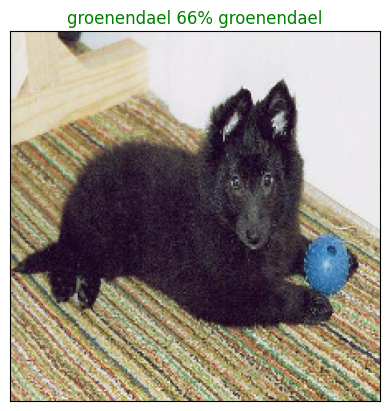

In [53]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images = val_images,
          n = 77)

### Now time for top 10 predictions
- create a function which shows
    * Prediction probability indexes
    * prediction probability values
    * Prediction labels
- Plot every shit above


In [54]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation="vertical")
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass




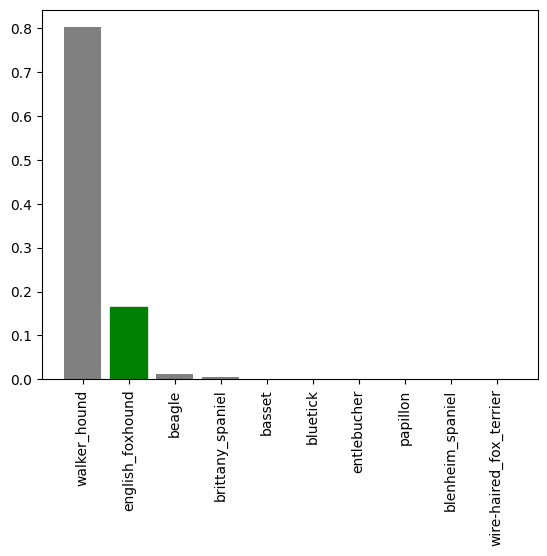

In [55]:
plot_pred_conf(prediction_probabilities= predictions,
               labels = val_labels,
               n = 42)

In [56]:
predictions[0]

array([2.55460531e-04, 2.24676751e-05, 2.34730705e-03, 4.19817516e-05,
       2.97376973e-04, 1.27101666e-05, 2.09145509e-02, 3.65071290e-04,
       1.14480237e-04, 6.04969217e-04, 3.28752212e-04, 1.02233095e-03,
       2.71558471e-04, 9.54278657e-05, 1.42361590e-04, 1.74612622e-04,
       1.36578121e-04, 3.47092003e-01, 3.48067515e-05, 6.83798135e-05,
       2.53275095e-04, 3.09593306e-05, 3.28686219e-05, 6.24136359e-04,
       1.95116190e-05, 4.78223083e-04, 1.88846573e-01, 2.04519718e-04,
       3.08987452e-04, 4.05289815e-04, 1.72626227e-04, 1.66221277e-03,
       2.86222697e-04, 6.39184509e-05, 4.82515577e-04, 1.71772856e-02,
       1.60242180e-05, 1.10886910e-03, 7.16764625e-05, 4.29140055e-05,
       6.73685595e-03, 9.14233533e-05, 9.70007168e-05, 1.49225671e-04,
       1.38331461e-05, 5.17012631e-05, 1.80813367e-05, 4.82188072e-04,
       4.07839310e-04, 9.07502254e-05, 7.85408483e-04, 1.16619485e-04,
       4.51013970e-04, 6.12634176e-05, 1.46767634e-04, 3.64598745e-05,
      

In [57]:
predictions[0].argsort()[-10:][::-1]# [::-1] is to reverse
                                    # o/p is the sorted indexes of the predictions

array([ 17,  26, 103,  59,  70,  68, 102,  79, 100,   6])

In [58]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.347092  , 0.18884657, 0.06443175, 0.05783061, 0.04649666,
       0.02735946, 0.02326215, 0.02289954, 0.02110407, 0.02091455],
      dtype=float32)

In [59]:
predictions[0].max()

0.347092

### Combining them functions - plot_pred and plot_pred_conf

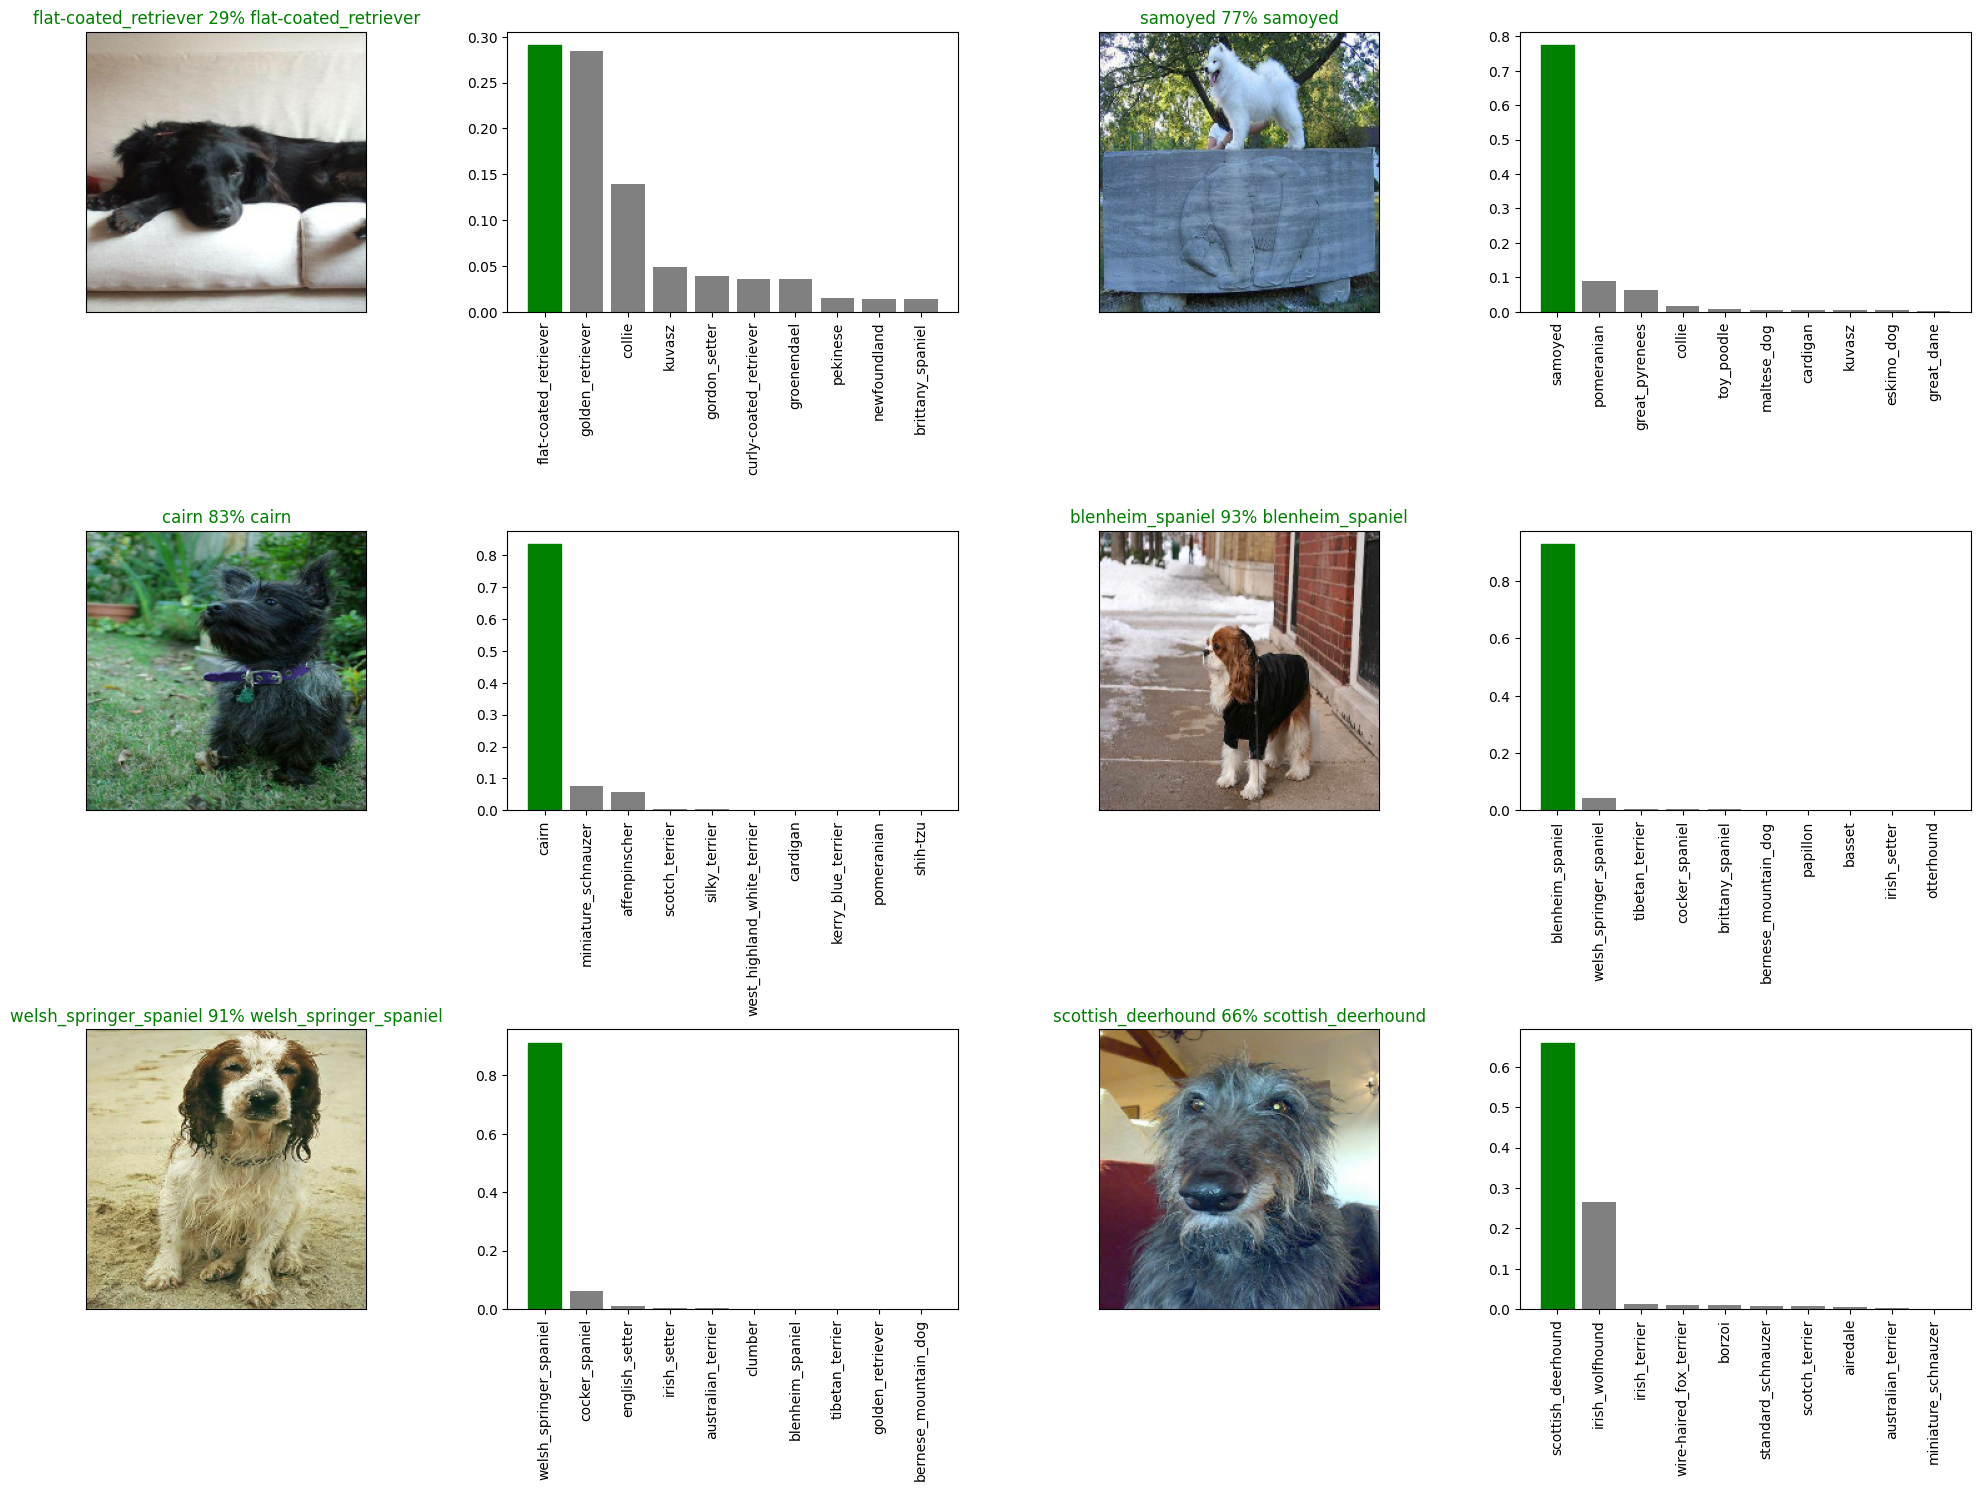

In [60]:
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images = val_images,
          n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels=val_labels,
                 n = i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


In [61]:
from sklearn.metrics import confusion_matrix
n = 4
pred_prob = predictions[n]
true_label = labels[n]
# pred_label = get_pred_label(pred_prob)


In [62]:
true_label, pred_label

('golden_retriever', 'dingo')

In [63]:
#confusion_matrix(true_label, pred_label)

## Saving the model

- create a function which saves the model
- create a function to load the model

In [64]:
def save_model(model, suffix=None):
  modeldir = os.path.join("drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-"+suffix + ".h5"
  print(f"Saving Model to: {model_path}...")
  model.save(model_path)
  return model_path

In [65]:
def load_model(model_path):
  print(f"Loading model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})# this line is just because we used an extra layer - KerasLayer
  return model

In [66]:
# Saving 1000 img trained model
save_model(model, suffix = "1000-images-mobilenetv2-Adam")

Saving Model to: drive/MyDrive/Dog Vision/models/20231006-13101696597824-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/Dog Vision/models/20231006-13101696597824-1000-images-mobilenetv2-Adam.h5'

In [67]:
# Load the model
loaded_1000_image_model = load_model('drive/MyDrive/Dog Vision/models/20231001-14091696169347-1000-images-mobilenetv2-Adam.h5')

Loading model from: drive/MyDrive/Dog Vision/models/20231001-14091696169347-1000-images-mobilenetv2-Adam.h5


In [68]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 6s 760ms/step - loss: 1.2669 - accuracy: 0.6800


[1.2669422626495361, 0.6800000071525574]

## Training full data model
**Important** : We dont use validation dataset in full data
- batch em
- create a model
- create callbacks
- fit the model in full data

In [69]:
full_data =create_data_batches(X,y)

Creating training data batches...


In [70]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [71]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)


In [72]:
full_model.fit(x = full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 1108s 3s/step - loss: 1.3462 - accuracy: 0.6665
Epoch 2/100
320/320 [==============================] - 315s 984ms/step - loss: 0.4016 - accuracy: 0.8813
Epoch 3/100
320/320 [==============================] - 324s 1s/step - loss: 0.2373 - accuracy: 0.9354
Epoch 4/100
320/320 [==============================] - 313s 977ms/step - loss: 0.1534 - accuracy: 0.9629
Epoch 5/100
320/320 [==============================] - 316s 987ms/step - loss: 0.1073 - accuracy: 0.9796
Epoch 6/100
320/320 [==============================] - 317s 989ms/step - loss: 0.0762 - accuracy: 0.9876
Epoch 7/100
320/320 [==============================] - 317s 991ms/step - loss: 0.0595 - accuracy: 0.9904
Epoch 8/100
320/320 [==============================] - 315s 984ms/step - loss: 0.0477 - accuracy: 0.9933
Epoch 9/100
320/320 [==============================] - 317s 992ms/step - loss: 0.0363 - accuracy: 0.9964
Epoch 10/100
320/320 [==============================] - 322s

In [73]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving Model to: drive/MyDrive/Dog Vision/models/20231006-15161696605364-full-image-set-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog Vision/models/20231006-15161696605364-full-image-set-mobilenetv2-Adam.h5'

In [74]:
loaded_full_model = load_model('drive/MyDrive/Dog Vision/models/20231005-17101696525825-full-image-set-mobilenetv2-Adam.h5')

Loading model from: drive/MyDrive/Dog Vision/models/20231005-17101696525825-full-image-set-mobilenetv2-Adam.h5


## Using Test dataset for predictions
- Import test dataset
- turn em into batches using `create_data_batches` setting `test_data = True`
- use `predict()`

In [75]:
testpath = '/content/drive/MyDrive/Dog Vision/test/'
test_filenames = [testpath + fname for fname in os.listdir(testpath)]
test_filenames[:10]

['/content/drive/MyDrive/Dog Vision/test/dff4932a639f0bf9b1e693fff89fc898.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e6c9d8058cbc9b1665aecac1ae179288.jpg',
 '/content/drive/MyDrive/Dog Vision/test/df645ae75554d4d7130bfa1b72be53ce.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e7fcdf9671a6593b638cbee42842f981.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e089aa32bc96c2a9753e7a5fcdc1bac9.jpg',
 '/content/drive/MyDrive/Dog Vision/test/de59703200e1b19b520033e76dea9b62.jpg',
 '/content/drive/MyDrive/Dog Vision/test/dfc0659b3b6eff35dc50d2501f1ea247.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e783e22d4f370b6cc0b1f44b4d6584a8.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e73efb021b7b49e328b2159d34060b82.jpg']

In [76]:
len(test_filenames)

10357

In [77]:
test_data = create_data_batches(test_filenames, test_data=True)



Creating test data batches...


In [78]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [79]:
test_predictions = loaded_full_model.predict(test_data,
                                             verbose = 1)

324/324 [==============================] - 525s 2s/step


## Save the OUTPUT
- Save the predictions in an `.csv` file

In [80]:
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [81]:
test_predictions = np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter=",")

In [82]:
test_predictions[:10]

array([[8.44575018e-02, 1.47541584e-06, 2.10269013e-06, ...,
        2.76887931e-07, 4.64621195e-07, 4.95413806e-05],
       [6.26817664e-09, 3.58088492e-09, 2.73122747e-09, ...,
        7.85726934e-06, 1.02005826e-08, 2.87637518e-11],
       [2.33778806e-07, 1.09917968e-08, 3.24388871e-08, ...,
        3.18733953e-07, 5.92002836e-11, 3.74501485e-10],
       ...,
       [2.54838799e-08, 1.54125518e-10, 4.06732692e-09, ...,
        2.25980748e-05, 4.32743806e-11, 2.56676280e-09],
       [3.11593624e-07, 1.37634852e-05, 1.47102423e-06, ...,
        1.44804344e-05, 9.85315163e-10, 2.50265089e-07],
       [4.40646364e-09, 4.70855888e-08, 4.20735020e-08, ...,
        1.00161571e-06, 2.11324447e-09, 1.22037989e-08]])

In [83]:
test_predictions.shape

(10357, 120)

### Editing them predictions csv fancy

In [86]:
preds_df = pd.DataFrame(columns=["id"]+ list(unique_breeds))
preds_df[:10]

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [94]:
file_path = 'drive/MyDrive/Dog Vision/test'

In [97]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(file_path)]
test_ids[:10]
preds_df["id"] = test_ids

In [99]:
preds_df[list(unique_breeds)] = test_predictions

In [100]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  dff4932a639f0bf9b1e693fff89fc898   8.445750e-02  1.475416e-06   
1  e6c9d8058cbc9b1665aecac1ae179288   6.268177e-09  3.580885e-09   
2  df645ae75554d4d7130bfa1b72be53ce   2.337788e-07  1.099180e-08   
3  e7fcdf9671a6593b638cbee42842f981   5.791224e-15  9.576089e-12   
4  e089aa32bc96c2a9753e7a5fcdc1bac9   2.550448e-10  7.486770e-09   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         2.102690e-06  8.832762e-08                    7.894365e-09   
1         2.731227e-09  3.042875e-12                    1.654182e-07   
2         3.243889e-08  2.198704e-06                    2.531494e-08   
3         1.252322e-13  4.334165e-13                    6.451841e-13   
4         2.154618e-10  8.914630e-10                    1.711960e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  8.202750e-06        1.874616e-08  5.811942e-09  3.855739e-08  ...   
1  7.862887e-07        9.480179e-08  1.303441e-08  3.909624e-13  ...   
2  7.144644e-09        1.466062e-11  2.129722e-10  1.710944e-10  ...   
3  7.349990e-12        4.124534e-13  1.512256e-12  1.510885e-10  ...   
4  5.955657e-09        6.629717e-11  7.059178e-12  9.325956e-12  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  4.462568e-04  1.901388e-09  2.590309e-07  1.001748e-08  3.610542e-09   
1  1.248284e-08  1.894182e-11  7.098582e-11  2.460274e-08  6.798793e-11   
2  1.736685e-09  1.060004e-09  6.044750e-08  2.947443e-08  2.601121e-07   
3  1.469197e-15  5.744998e-14  2.944516e-15  1.874764e-11  3.914699e-15   
4  1.748416e-12  2.581112e-10  5.818232e-11  6.438790e-09  5.550033e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.784903e-08                 1.946633e-07  2.768879e-07   
1            2.521312e-10                 1.432959e-09  7.857269e-06   
2            7.398513e-09                 7.443293e-10  3.187340e-07   
3            9.999999e-01                 7.676557e-12  7.595231e-12   
4            4.697173e-12                 1.644606e-09  2.257367e-05   

   wire-haired_fox_terrier  yorkshire_terrier  
0             4.646212e-07       4.954138e-05  
1             1.020058e-08       2.876375e-11  
2             5.920028e-11       3.745015e-10  
3             5.945452e-12       4.285504e-15  
4             3.191333e-08       2.709122e-11  

[5 rows x 121 columns]

In [101]:
preds_df.to_csv("drive/MyDrive/Dog Vision/full_model_pred_mobilenetV2.csv",
                index=False)

# Custom predictions!!!!
- Get file path
- turn em images to batches
- pass it thro `predict()`
- convert predictions to labels
- compare with custom images

In [102]:
custom_path = "drive/MyDrive/Dog Vision/custom_preds/"
custom_image_paths = [custom_path+ fname for fname in os.listdir(custom_path)]

In [103]:
custom_image_paths

['drive/MyDrive/Dog Vision/custom_preds/beagle.jpg',
 'drive/MyDrive/Dog Vision/custom_preds/husky.jpg']

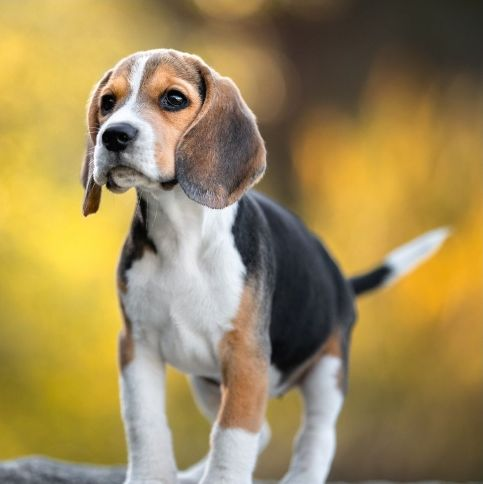

In [115]:
Image(custom_image_paths[0])

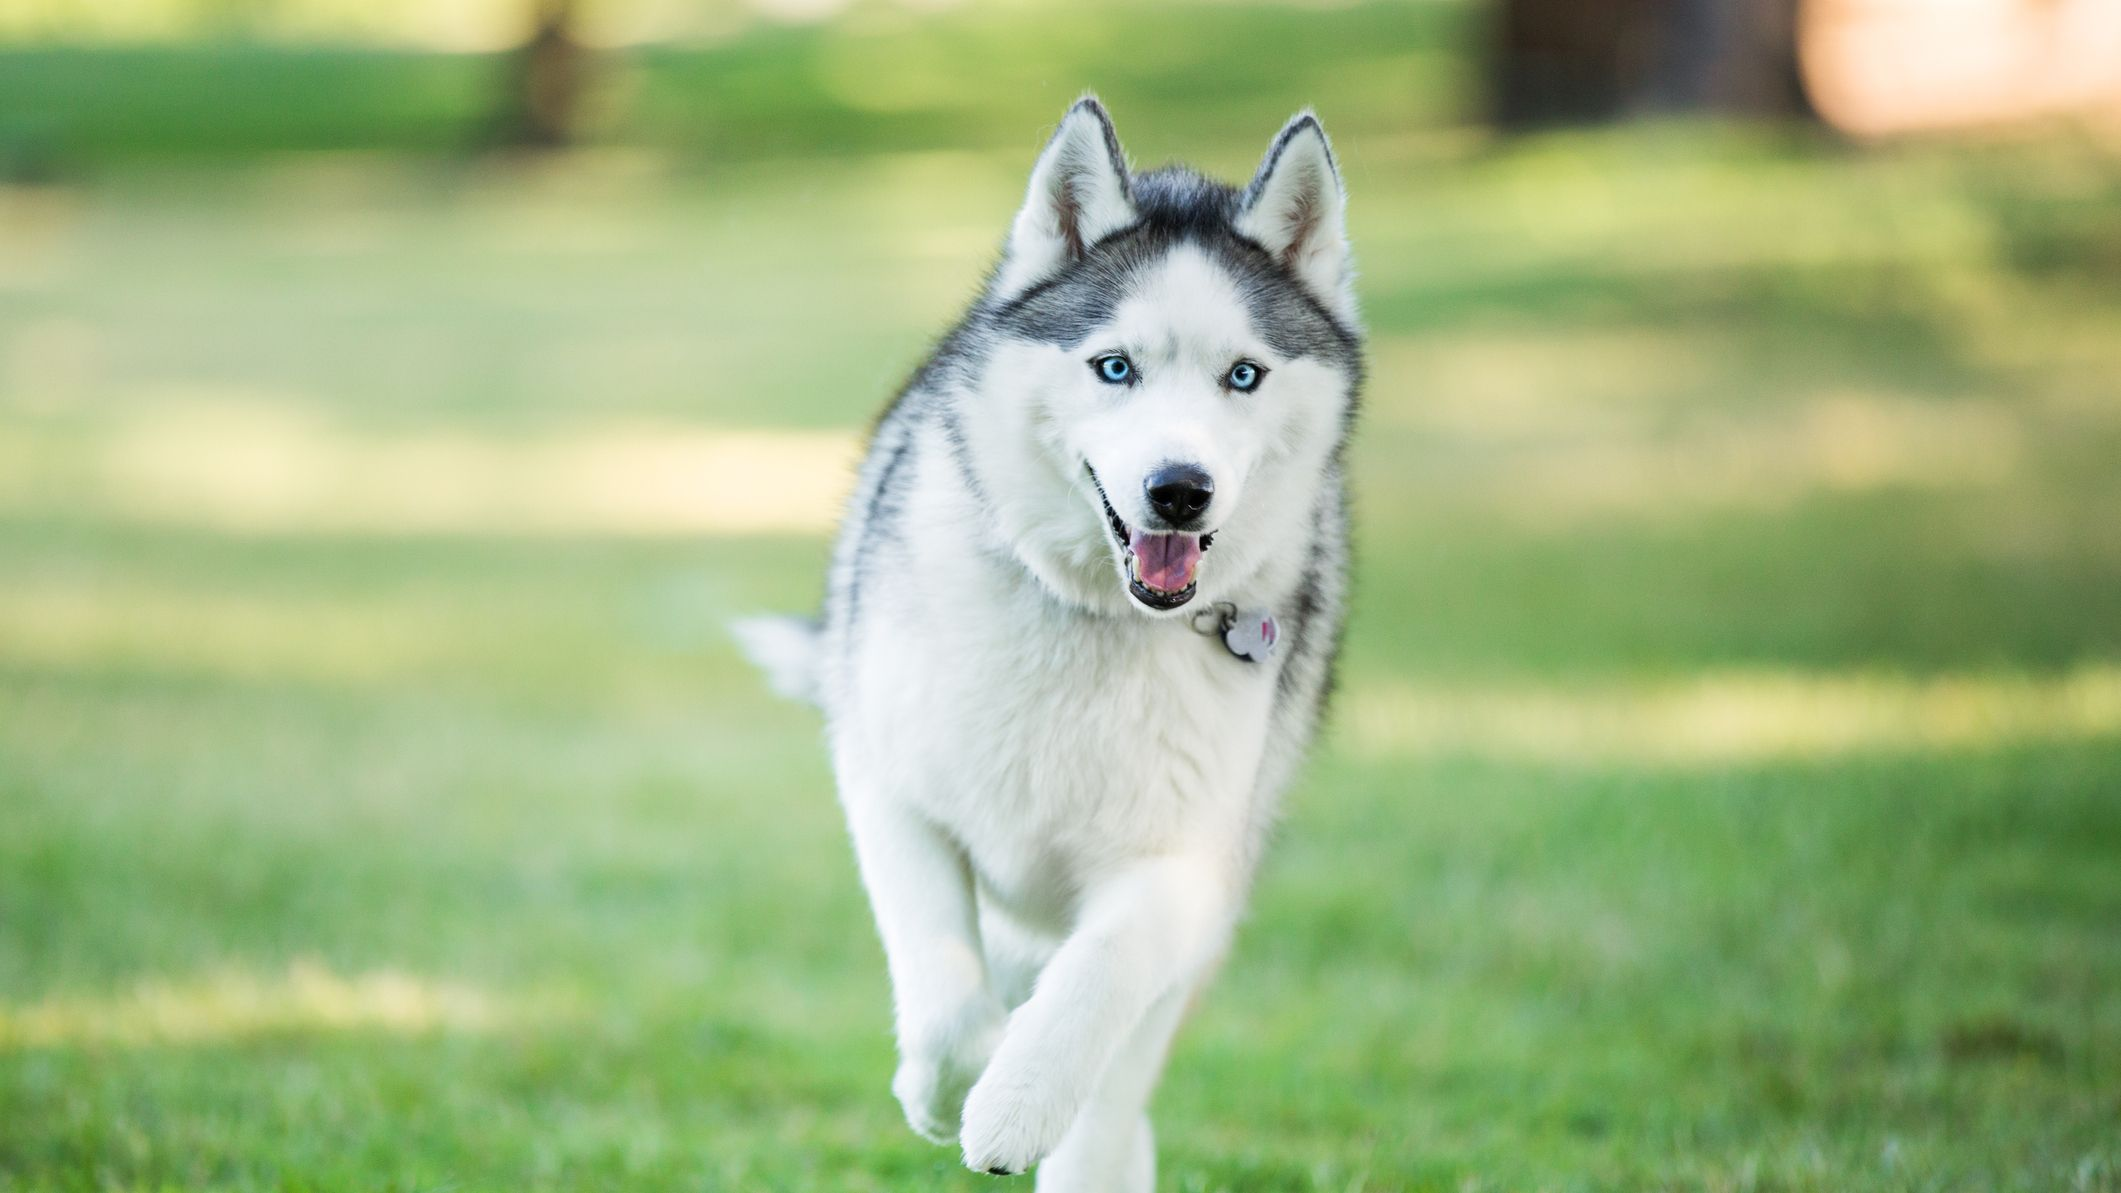

In [116]:
Image(custom_image_paths[1])

In [104]:
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [105]:
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 104ms/step


In [106]:
custom_preds.shape

(2, 120)

In [108]:
custom_pred_labels=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['beagle', 'siberian_husky']

In [112]:
# unbatch all - cant use unbatchify() cuz labels aint there
custom_images=[]

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

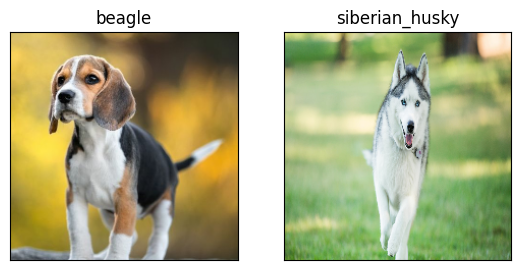

In [113]:
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images): #save index in i and imagedata in image
      plt.subplot(1,3,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.title(custom_pred_labels[i])
      plt.imshow(image)